# Inhaltsverzeichnis 

- **`scikit-learn`**
    - **1. Module und Datensatz importieren**
    - **2. Preprocessing der Daten**
        - **Daten visualisieren**
        - **Train-Test-Split**
    - **4. Modell auswählen**
    - **5. Modell trainieren**
        - **Vorhersagen treffen**
    - **6. Modell evaluieren**
- **Aufgabe**


# `scikit-learn`

Die Bibliothek [`scikit-learn`](https://scikit-learn.org/stable/index.html) ist ein mächtiges Open-Source Projekt, welches Entwicklern erlaubt, komplexe Machine Learning Ansätze mittels wenig Zeilen Code umzusetzen.

Viele dieser Modelle werden wir uns näher in den nächsten Wochen ansehen, wie z.B. SVM, Random Forest, nearest Neighbors, und andere. 

Aus diesen Grund ist erstmal den allgemeinen "Workflow" von `scikit` zu verstehen, ohne dass wir im Detail in den Klassen und Modell gehen. Die konkreten Modelle werden wir in den folgenden Wochen genauer untersuchen.

Die Pipeline für (fast) alle ML Anwendungen mit `sklearn` ist meist gleich.

## 1. Module und Datensatz importieren


Im Kurs werden wir mit sowohl mit realen als auch mit synthetischen Daten arbeiten. Für dieses Beispielnotebook generieren wir zufällig 500 Datenpunkte aus 3 Klassen. Hierfür nutzen wir die Funktion [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [ ]:
# mit SVC KLASSIFIKATOR

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets 

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create 500 datasamples with 2 Features in 3 classes
data = datasets.make_blobs(n_samples=500,centers = 3, n_features=2, random_state=35)

data

(array([[-7.71216395e+00, -5.65110681e+00],
        [ 5.47108545e+00, -8.23619325e+00],
        [-4.02380822e+00, -5.91045141e+00],
        [ 7.47445743e+00, -7.80553709e+00],
        [ 6.30655281e+00, -8.23225947e+00],
        [ 7.23072135e+00, -5.39988404e+00],
        [-5.28608627e+00, -4.78231013e+00],
        [ 6.54341267e+00, -6.44442116e+00],
        [-6.10804631e+00, -4.77352128e+00],
        [-6.98500773e-01, -3.85714378e+00],
        [-3.81398826e+00, -4.74016730e+00],
        [ 8.53738394e+00, -7.82855384e+00],
        [ 9.89690932e-02, -5.25137804e+00],
        [ 7.10673300e+00, -8.98930345e+00],
        [-6.13683898e+00, -4.81826612e+00],
        [-4.26139137e+00, -4.90339632e+00],
        [-5.79107236e+00, -6.21107766e+00],
        [-1.01155744e+00, -3.13265875e+00],
        [ 7.25556968e+00, -7.05891021e+00],
        [-5.91423687e+00, -4.83459518e+00],
        [ 6.00385901e+00, -7.68424150e+00],
        [-5.67144044e+00, -6.54376146e+00],
        [-6.02020909e+00, -4.813

Die Methode `make_blobs` hat 500 synthetische Datenpunkte im zweidimensionalen Raum (also 2 Features) und ihre Labels erstellt. Allerdings stehen beide im Array `data` (scrolle nach unten um die Labels zu sehen).
Aus diesem Grund wollen wir unsere Daten in zwei Variable aufteilen. In Machine Learning wird die Variable `X` für die d-dimensionale Datenpunkte und `y` für die Liste der Labels benutzt.

> <span style="color:red"> **_WICHTIG:_** </span> `X` und `y` beschreiben *nicht* die Achsen eines kartesischen Koordinatensystemes! 

In ML werden häufig mehrdimensionale Räume betrachtet. Zum Beispiel befindet sich ein Bild mit 8x8 Pixeln in einem 64-dimensionalen Raum. Es besteht damit aus 64 Features. 
Damit wir leicht die Daten visualisieren können, haben wir uns in diesem Beispiel 2-dimensionale Daten erzeugt.
Wir müssen die Daten vorverarbeiten, um sie bereit für das Machine Learning zu machen.




## 2. Preprocessing der Daten



In [2]:
# 2-Dimensionales Array der Datenpunkte
X = data[0]

# Liste der Labels
y = data[1]

# Liste der unique Labels
labels = np.unique(y)

print(f"Die ersten 10 Datenpunkte:\n{X[:10]}")
print(f"\nDie erste 10 Labels:\n{y[:10]}")
print(f"\nAlle einzigartigen Labels:\n{labels}")

Die ersten 10 Datenpunkte:
[[-7.71216395 -5.65110681]
 [ 5.47108545 -8.23619325]
 [-4.02380822 -5.91045141]
 [ 7.47445743 -7.80553709]
 [ 6.30655281 -8.23225947]
 [ 7.23072135 -5.39988404]
 [-5.28608627 -4.78231013]
 [ 6.54341267 -6.44442116]
 [-6.10804631 -4.77352128]
 [-0.69850077 -3.85714378]]

Die erste 10 Labels:
[1 2 1 2 2 2 1 2 1 0]

Alle einzigartigen Labels:
[0 1 2]


###  Daten visualisieren

Bevor man die Machine Learning Alogirthmen auf die Daten anwendet, möchte man in vielen Fällen die Daten visualisieren. Hierfür gibt es verschiedene Plots, welche man anwenden kann. In diesem Beispiel wollen wir einen einfachen `Scatterplot` machen. D.h. das erste Feature der Daten entspricht der X-Achse und das zweite Feature entspricht der Y-Achse.

> <span style="color:green"> **_ERINNERUNG:_** </span> Indexing eines zweidimensionales Arrays ist möglich durch:<br> `X [ row_start : row_finish , column_start : column_finish ]`

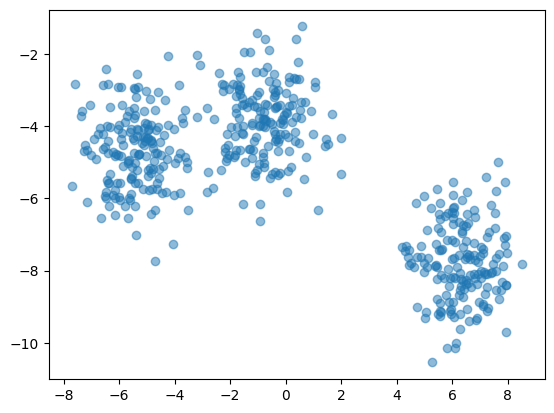

In [3]:
plt.scatter(X[:,0], X[:,1], alpha=.5)

Um einen Überblick über die Klassen zu bekommen, fügen wir auch die Labels als Farbe hinzu. 

Dafür iterieren wir durch die Liste der unique Klassenlabels und plotten dessen Datenpunkte in der Figur.
(Wir werden später noch eine Visualisierungsbibliothek kennenlernen, womit dieser Plot einfacher zu erzeugen ist.)

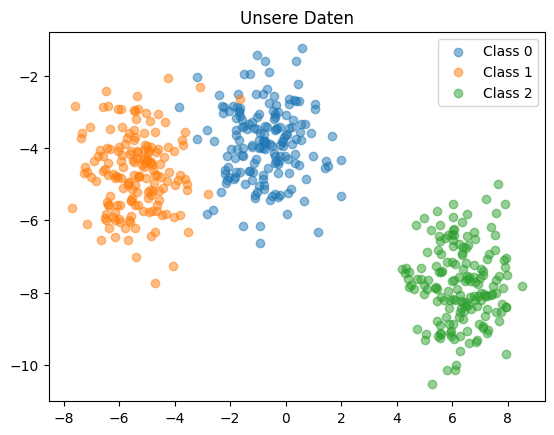

In [4]:
for label in labels:
    
    # Nur Datenpunkte der Klasse `label`
    label_X = X[y == label]
    
    # Plotten der Datenpunkte
    plt.scatter(label_X[:,0], label_X[:,1], alpha=.5, label=f"Class {label}")

plt.title("Unsere Daten")
plt.legend()

### Train-Test-Split

Wir haben jetzt 500 gelabelte Datenpunkte. Ein wichtiges Konzept im Entwicklungsprozess ist die Evaluation des Modells nachdem es trainiert wurde. Dafür brauchen wir Datenpunkte, die der Algorithmus noch nicht gesehen hat, also auf denen er nicht trainiert hat.

Aus diesem Grund teilen wir unseren Datensatz in *Trainings-* und *Testdaten*. 
Dann benutzen wir ersteren, um das Modell zu trainieren und den zweiten, um das Modell zu evaluieren. Danach können wir auch neue nicht gekennzeichnete Punkte generieren und Vorhersagen treffen.

Zum Splitten der Daten verwenden wir die Funktion [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) des Moduls `sklearn.model_selection`. Hier muss man selber auswählen, was eine gutes Verhältnis zwischen Trainings- und Testdaten ist, um Over-/ Underfitting zu vermeiden.

**Parameter**:
- `X`: Ein Array der Datenpunkte
- `y`: Eine Liste der Labels
- `test_size`: Anteil der Testdaten
- `random_state`: Random seed

**Rückgabe**:
- `X_train, X_test, y_train, y_test`

Hierbei ist

- `X_train`: Die Features des Traingsdatensatzes
- `X_test`: Die Features des Testdatensatzes
- `y_train`: Die Labels des Trainingsdatensatzes
- `y_test`: Die Labels des Testdatensatzes

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("--------------------------")
print("--- Gesamter Datensatz ---")
print(f"X:       {X.shape}")
print(f"y:       {y.shape}")

print("--------------------------")
print("----- Trainingsdaten -----")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("-------------------------")
print("------- Testdaten -------")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

--------------------------
--- Gesamter Datensatz ---
X:       (500, 2)
y:       (500,)
--------------------------
----- Trainingsdaten -----
X_train: (400, 2)
y_train: (400,)
-------------------------
------- Testdaten -------
X_test:  (100, 2)
y_test:  (100,)


Wir wollen nochmals die Daten visualisieren. Dieses Mal wollen wir zwischen Trainings- und Testdaten unterscheiden.


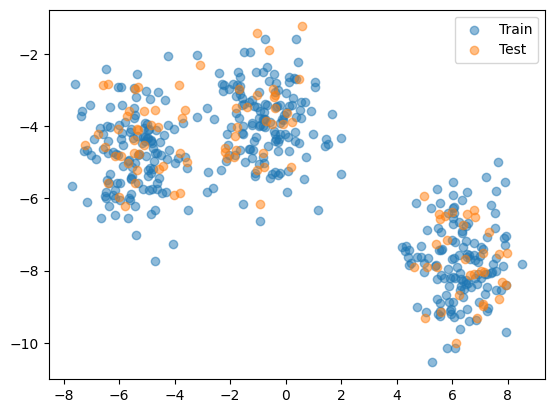

In [6]:
# Plotten der Trainingsdatenpunkte
plt.scatter(X_train[:,0], X_train[:,1], alpha=.5, label=f"Train")

# Plotten der Testdatenpunkte
plt.scatter(X_test [:,0], X_test [:,1], alpha=.5, label=f"Test")

plt.legend()

# 4. Modell trainieren

In [7]:
clf = SVC()

clf.fit(X_train, y_train)

SVC()

**Wir haben ein trainiertes Modell!**

Dieses ist ansprechbar über den Variable `clf`.

### Vorhersagen treffen

Unser Ziel war es Vorhersagen über neue Datenpunkte zu machen, also die Frage zu beantworten, zu welcher Klasse sie gehören. Wir wollen nun die Vorhersagen für unsere Testdaten berechnen, dazu verwenden wir die Methode `predict` und übergeben als Argument unsere Testdaten `X_test`.

> <span style="color:red"> **_WICHTIG:_** </span> **Jedes** Modell in scikit hat die `predict`-Methode!

In [8]:
predictions = clf.predict(X_test)

predictions

array([1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1,
       1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0,
       0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2])

## 5. Modell evaluieren

Wir vergleichen jetzt `predictions` mit den wahren Labels `y_test` der Testdaten.

Predicted that [-3.85554227 -2.85069962] is 1. Real label: 0.
Predicted that [-3.07622188 -2.30689372] is 0. Real label: 1.


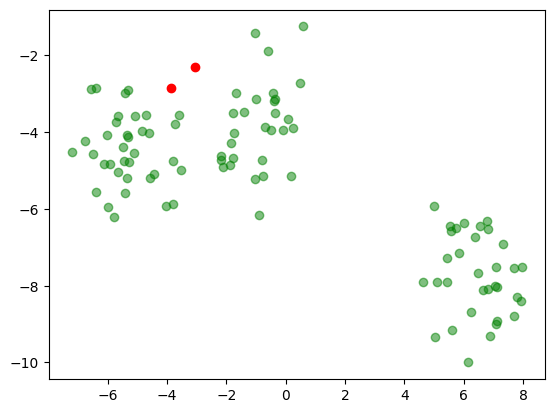

In [9]:
wrong_predictions = []
correct_predictions = []

for idx, pred in enumerate(predictions):

    # Falsche Vorhersage
    if pred !=  y_test[idx]:

        print(f"Predicted that {X_test[idx]} is {pred}. Real label: {y_test[idx]}.")
        wrong_predictions.append(X_test[idx])

    # Korrekte Vorhersage
    else:
        correct_predictions.append(X_test[idx])

# Listen zu Arrays umwandeln
wp = np.array(wrong_predictions)
cp = np.array(correct_predictions)

# Plotten
plt.scatter(wp[:,0], wp[:,1], c='r')
plt.scatter(cp[:,0], cp[:,1], c='g', alpha=.5)

Nur 2 Datenpunkte wurden der falschen Klasse zugewiesen. Kein schlechtes Ergebnis!

Natürlich, wollen wir unser Modell nicht immer manuell bzw. visuell evaluieren. Es gibt eine Metriken, welche die Performance eines Modells berechnen können.
Dazu wird uns das Modul [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) zur Verfügung gestellt. Hier finden wir einen Überblick über genutzte Metriken. In der Praxis häufig benutzte Funktionen sind der F1-Score, der MSE (*Mean-Squared-Error*), und der Loss. Für diesen Fall  wählen  wir `accuracy_score`, aber werden im Laufe der Lektion auch weitere Metrics nutzen. 

Der `accuracy_score` berechnet die Anzahl der korrekt vorhergesagten Klassen im Verhältnis zu der Gesamtanzahl aller Datenpunkte.

\begin{align}
        \text{acc} = \frac{\text{Korrekt klassifiziert}}{\text{Gesamtanzahl Datenpunkte}}
\end{align}

In [10]:
clf_score = accuracy_score(y_test, predictions)
print("Accuracy Score: %1.3f" % clf_score)
print("Accuracy Score in Prozent: %d %% " % (clf_score *100))

Accuracy Score: 0.980
Accuracy Score in Prozent: 98 % 


Wir haben nun den  Prozess eines ML-Projektes mit `scikit` angeschaut. Die einzelnen Schritte waren

1. **Daten importieren** 
2. **Preprocessing der Daten**
    - **Daten visualisieren** 
    - **Daten in Test- und Trainingsdatensatz splitten**
5. **Modell auswählen**
6. **Modell trainieren**
7. **Modell evaluieren**
